In [259]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [260]:
df=pd.read_csv('taxi.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [261]:
df.shape

(120000, 8)

In [262]:
df.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


## FEATURE ENGINEERING

## FEATURE ENGINEERING FOR DATETIME FEATURE

In [264]:
# only for date and time period column
pd.to_datetime(df['pickup_datetime'])

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [265]:
datetime.timedelta(hours=2)

datetime.timedelta(0, 7200)

In [266]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['pickup_datetime']

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [267]:
df['pickup_datetime'].dt.month

0         4
1         4
2         4
3         4
4         4
         ..
119995    4
119996    4
119997    4
119998    4
119999    4
Name: pickup_datetime, Length: 120000, dtype: int64

In [268]:
df['Year']=df['pickup_datetime'].dt.year
df['Month']=df['pickup_datetime'].dt.month
df['Day']=df['pickup_datetime'].dt.day
df['Hours']=df['pickup_datetime'].dt.hour
df['Minutes']=df['pickup_datetime'].dt.minute

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

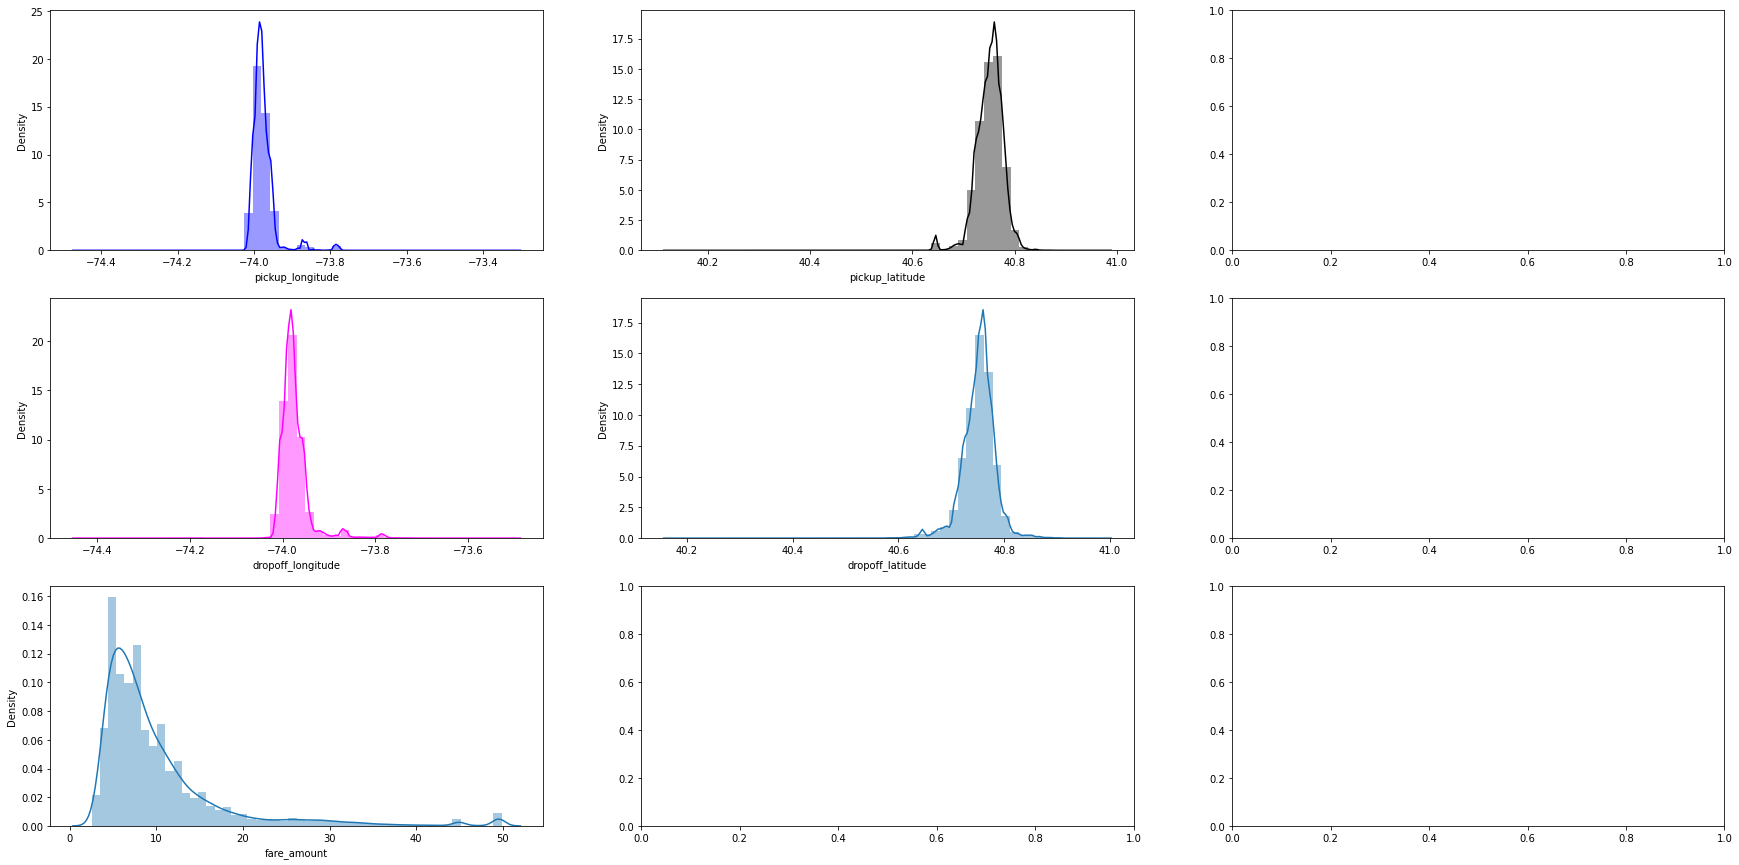

In [269]:
## New York latitude is 40.7 and longititude is 74.0
fig, ax = plt.subplots(3,3,figsize = (30,15))
sns.distplot(df["pickup_longitude"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(df["pickup_latitude"], kde =True, ax=ax[0,1], color = "black")
sns.distplot(df["dropoff_longitude"], kde =True, ax=ax[1,0], color = "magenta")
sns.distplot(df["dropoff_latitude"], kde =True, ax=ax[1,1])
sns.distplot(df["fare_amount"], kde =True, ax=ax[2,0])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


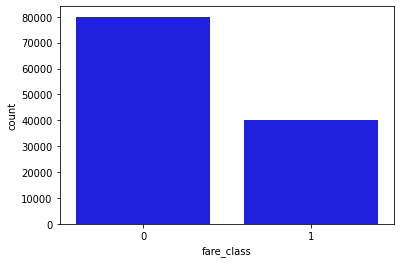

In [270]:
sns.countplot(df["fare_class"], color = "blue")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


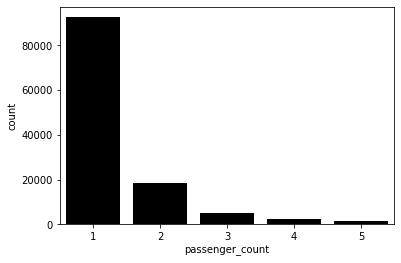

In [271]:
sns.countplot(df["passenger_count"], color = "black")

## HAVERSINE DISTANCE FOR LONGITITUDES AND LATITUDES

In [272]:
np.radians(-73.992365)

-1.2914103905874141

In [273]:
np.radians(40.730521)

0.7108816975026934

In [274]:
# https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
# calculate the distance between two gps points. 
#r = 6371 (i.e) Radius of earth in kilometers. Use 3956 for miles
def haversine(p_lat, p_long, d_lat, d_long):
    p_lat, p_long, d_lat, d_long = map(np.radians,[p_lat, p_long, d_lat, d_long])
    dlat = d_lat-p_lat
    dlong = d_long-p_long
    a = np.sin(dlat/2)**2 + np.cos(p_lat) * np.cos(d_lat) * np.sin(dlong/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 
    return c * r

In [275]:
df['Total_distance']=haversine(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude)
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,8,17,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,15,43,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,11,23,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,21,25,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,2,19,7.231321


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


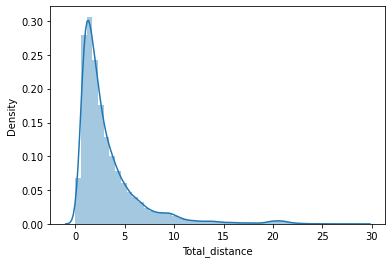

In [276]:
sns.distplot(df["Total_distance"], kde =True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


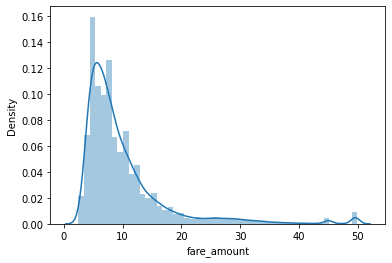

In [277]:
sns.distplot(df["fare_amount"], kde =True)

In [278]:
df.drop(["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "pickup_datetime"], axis=1, inplace=True)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
1,6.9,0,1,2010,4,17,15,43,1.392307
2,10.1,1,2,2010,4,17,11,23,3.326763
3,8.9,0,1,2010,4,11,21,25,1.864129
4,19.7,1,1,2010,4,17,2,19,7.231321


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

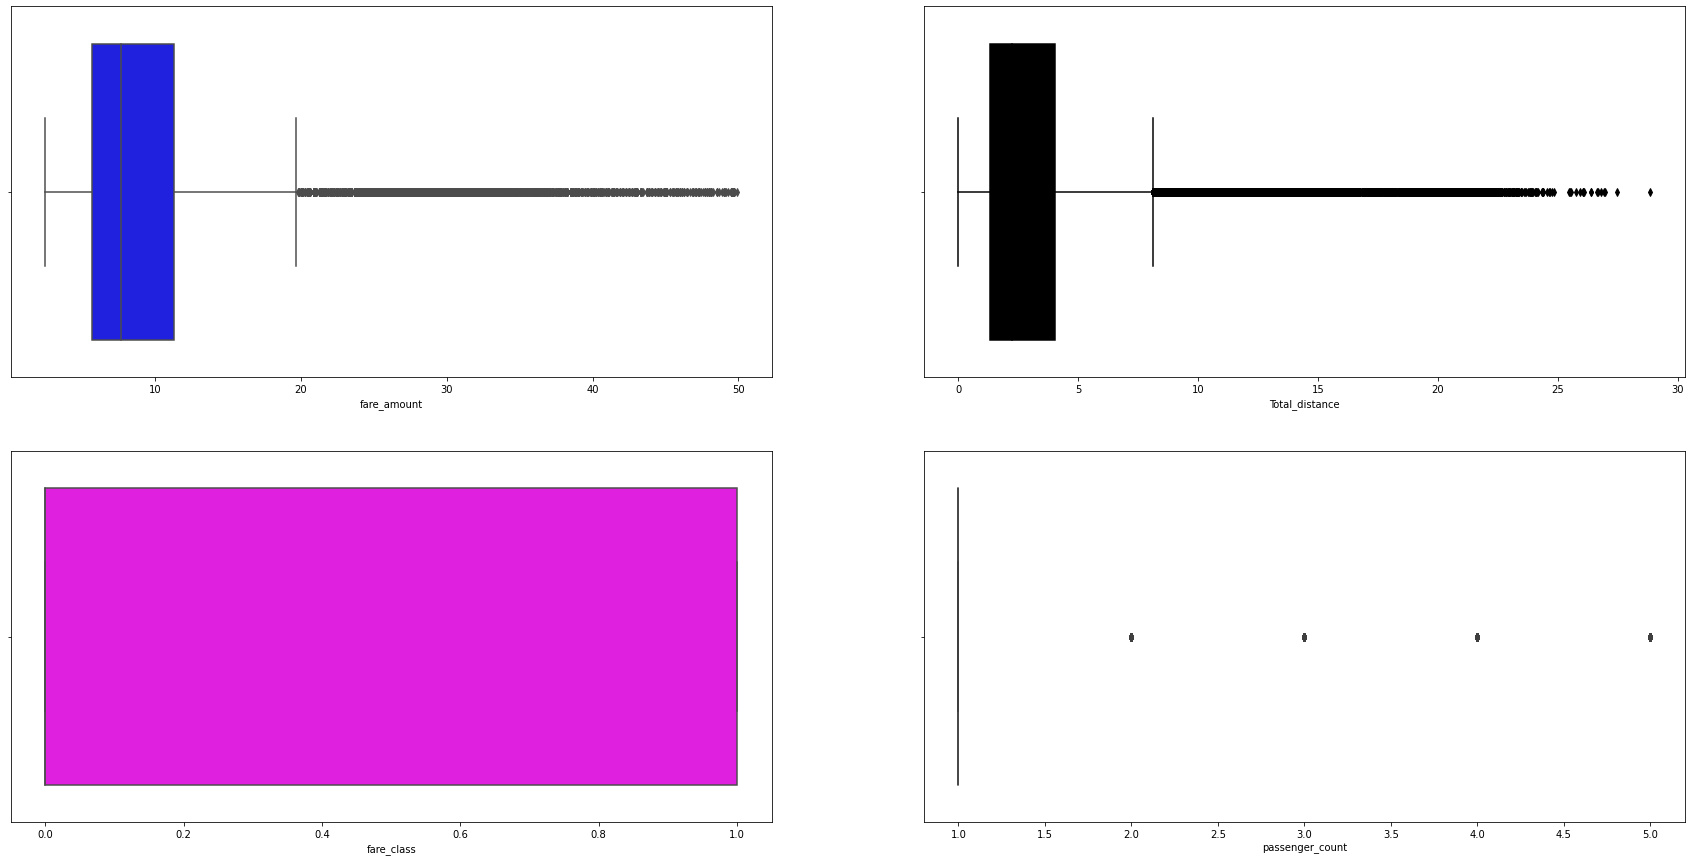

In [279]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df["fare_amount"], ax=ax[0,0], color = "blue")
sns.boxplot(df["Total_distance"], ax=ax[0,1], color = "black")
sns.boxplot(df["fare_class"], ax=ax[1,0], color = "magenta")
sns.boxplot(df["passenger_count"], ax=ax[1,1])


## OUTLIERS REMOVAL

In [280]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
1,6.9,0,1,2010,4,17,15,43,1.392307
2,10.1,1,2,2010,4,17,11,23,3.326763
3,8.9,0,1,2010,4,11,21,25,1.864129
4,19.7,1,1,2010,4,17,2,19,7.231321


In [281]:
df.shape

(120000, 9)

In [282]:
# https://www.taxi-calculator.com/taxi-rate-new-york-city/259. Taking the information from the mentioned website. $ 4.10 = 1 km.
df[(df['fare_amount'] > 4.6) & (df['Total_distance'] < 1)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
17,5.7,0,1,2010,4,15,8,55,0.884574
22,4.9,0,1,2010,4,13,13,55,0.858184
34,5.6,0,1,2010,4,12,19,59,0.455160
40,4.9,0,1,2010,4,22,10,5,0.767521
44,6.5,0,2,2010,4,18,15,51,0.564182
...,...,...,...,...,...,...,...,...,...
119966,4.9,0,1,2010,4,23,16,45,0.998203
119969,7.7,0,1,2010,4,11,16,54,0.050811
119984,5.3,0,1,2010,4,16,17,34,0.934755
119992,5.7,0,1,2010,4,16,8,39,0.978120


In [283]:
df = df.drop(df[(df['fare_amount'] > 4.6) & (df['Total_distance'] < 1)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
1,6.9,0,1,2010,4,17,15,43,1.392307
2,10.1,1,2,2010,4,17,11,23,3.326763
3,8.9,0,1,2010,4,11,21,25,1.864129
4,19.7,1,1,2010,4,17,2,19,7.231321


In [284]:
#$ 6.2 = 2 km charge
df[(df['fare_amount'] > 6.2) & (df['Total_distance'] < 2)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
1,6.9,0,1,2010,4,17,15,43,1.392307
3,8.9,0,1,2010,4,11,21,25,1.864129
5,8.1,0,1,2010,4,22,8,39,1.958574
14,6.9,0,2,2010,4,21,10,12,1.711402
28,8.5,0,2,2010,4,23,19,11,1.942799
...,...,...,...,...,...,...,...,...,...
119944,7.7,0,2,2010,4,17,19,58,1.522837
119956,7.3,0,3,2010,4,11,16,45,1.104379
119962,7.7,0,1,2010,4,21,9,56,1.402838
119963,6.5,0,1,2010,4,14,22,27,1.891709


In [285]:
df = df.drop(df[(df['fare_amount'] > 6.2) & (df['Total_distance'] < 2)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [286]:
df[(df['fare_amount'] > 9) & (df['Total_distance'] < 3)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
36,9.7,0,2,2010,4,12,15,32,2.435028
76,10.5,1,3,2010,4,11,18,52,2.754072
122,12.1,1,3,2010,4,17,0,59,2.087824
132,9.3,0,1,2010,4,23,9,19,2.421650
153,10.1,1,1,2010,4,15,17,50,2.121679
...,...,...,...,...,...,...,...,...,...
119839,10.1,1,1,2010,4,19,11,20,2.496627
119861,11.7,1,2,2010,4,22,18,59,2.640533
119876,9.3,0,1,2010,4,14,15,21,2.566239
119939,9.7,0,1,2010,4,23,11,54,2.735313


In [287]:
df = df.drop(df[(df['fare_amount'] > 9) & (df['Total_distance'] < 3)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [288]:
df.shape

(93666, 9)

In [289]:
df[(df['fare_amount'] > 11) & (df['Total_distance'] < 4)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
39,12.90,1,5,2010,4,23,17,27,3.662039
58,13.30,1,2,2010,4,20,9,10,3.580064
74,11.70,1,1,2010,4,16,17,38,3.968437
75,14.50,1,1,2010,4,16,22,37,3.762905
154,11.70,1,1,2010,4,14,8,8,3.870700
...,...,...,...,...,...,...,...,...,...
119896,15.87,1,1,2010,4,20,18,47,3.221376
119902,14.10,1,2,2010,4,24,14,52,3.107681
119904,11.30,1,1,2010,4,25,3,53,3.970841
119912,12.50,1,1,2010,4,19,8,23,3.487944


In [290]:
df = df.drop(df[(df['fare_amount'] > 11) & (df['Total_distance'] < 4)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [291]:
df[(df['fare_amount'] > 13) & (df['Total_distance'] < 5)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
16,14.1,1,2,2010,4,15,21,54,4.762431
41,15.3,1,1,2010,4,15,12,49,4.036362
119,14.1,1,1,2010,4,17,0,57,4.813083
126,21.3,1,4,2010,4,24,19,57,4.993292
131,16.5,1,4,2010,4,24,14,32,4.370085
...,...,...,...,...,...,...,...,...,...
119811,14.5,1,1,2010,4,20,10,51,4.894539
119829,23.3,1,2,2010,4,18,14,17,4.826615
119831,15.3,1,1,2010,4,23,20,20,4.664253
119877,14.5,1,1,2010,4,16,12,2,4.341504


In [292]:
df = df.drop(df[(df['fare_amount'] > 13) & (df['Total_distance'] < 5)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [293]:
df[(df['fare_amount'] > 21) & (df['Total_distance'] < 10)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
20,36.00,1,1,2010,4,20,11,27,9.434908
30,25.47,1,1,2010,4,17,17,32,5.456683
82,25.47,1,1,2010,4,23,17,22,6.981611
120,23.30,1,2,2010,4,14,23,6,7.030089
212,22.90,1,1,2010,4,16,19,24,9.999087
...,...,...,...,...,...,...,...,...,...
119689,25.47,1,1,2010,4,18,21,56,8.417278
119719,22.50,1,1,2010,4,13,8,15,8.259155
119803,33.07,1,1,2010,4,24,20,42,9.802024
119826,26.27,1,1,2010,4,14,19,42,9.932961


In [294]:
df = df.drop(df[(df['fare_amount'] > 21) & (df['Total_distance'] < 10)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [295]:
df.shape

(84984, 9)

In [296]:
df['Total_distance'].max()

28.846365025624596

In [297]:
df['fare_amount'].max()

49.9

In [298]:
df[(df['fare_amount'] > 30) & (df['Total_distance'] < 15)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
64,33.30,1,1,2010,4,15,17,18,13.456857
168,39.30,1,2,2010,4,25,0,51,13.270664
273,38.67,1,1,2010,4,16,15,29,10.996258
328,34.10,1,2,2010,4,23,20,26,14.621577
388,31.47,1,1,2010,4,16,7,30,13.024054
...,...,...,...,...,...,...,...,...,...
119766,36.90,1,2,2010,4,18,22,33,13.814849
119837,38.67,1,1,2010,4,21,13,56,10.578121
119890,35.70,1,1,2010,4,17,17,11,11.502496
119931,44.50,1,1,2010,4,16,0,16,10.114594


In [299]:
df = df.drop(df[(df['fare_amount'] > 30) & (df['Total_distance'] < 15)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [300]:
df[(df['fare_amount'] > 38) & (df['Total_distance'] < 20)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
128,45.00,1,1,2010,4,14,13,44,19.861861
152,45.00,1,1,2010,4,13,10,0,18.543371
359,45.00,1,1,2010,4,18,6,44,19.915316
382,43.30,1,2,2010,4,12,18,52,18.869001
503,41.39,1,1,2010,4,24,2,16,17.886169
...,...,...,...,...,...,...,...,...,...
119389,41.07,1,1,2010,4,18,18,2,15.456354
119446,45.00,1,1,2010,4,14,6,43,19.882897
119497,49.57,1,1,2010,4,17,0,28,19.878600
119524,45.00,1,5,2010,4,15,5,33,19.846287


In [301]:
df = df.drop(df[(df['fare_amount'] > 38) & (df['Total_distance'] < 20)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [302]:
df[(df['fare_amount'] > 45) & (df['Total_distance'] < 25)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
158,49.57,1,4,2010,4,23,6,10,20.100177
250,49.57,1,1,2010,4,21,12,31,22.440213
330,49.57,1,1,2010,4,19,22,7,20.932646
663,49.57,1,1,2010,4,24,19,31,22.585147
740,49.00,1,1,2010,4,13,19,3,20.279862
...,...,...,...,...,...,...,...,...,...
119314,49.57,1,1,2010,4,20,14,40,23.975990
119454,49.57,1,1,2010,4,15,4,16,23.292363
119501,49.57,1,1,2010,4,23,20,49,21.747035
119668,49.57,1,1,2010,4,19,9,16,20.562647


In [303]:
df = df.drop(df[(df['fare_amount'] > 45) & (df['Total_distance'] < 25)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [304]:
df.shape

(82787, 9)

In [305]:
df['fare_amount'].max()

49.57

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


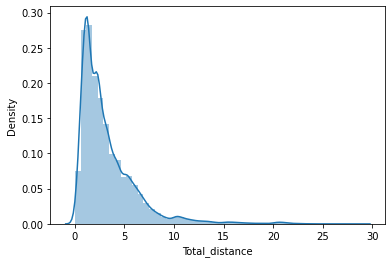

In [306]:
sns.distplot(df["Total_distance"], kde =True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


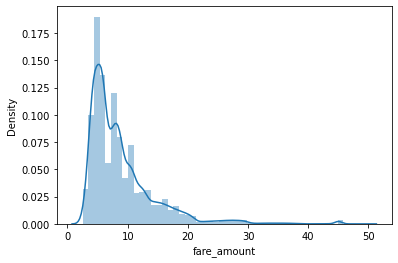

In [307]:
sns.distplot(df["fare_amount"], kde =True)

In [308]:
df[(df['fare_amount'] == 2.5) & (df['Total_distance'] > 0.5)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
1313,2.5,0,1,2010,4,19,19,29,7.165823
2757,2.5,0,1,2010,4,12,9,21,0.644529
3326,2.5,0,1,2010,4,19,22,27,1.904355
4972,2.5,0,1,2010,4,18,0,19,4.484539
5611,2.5,0,1,2010,4,17,7,58,14.338630
...,...,...,...,...,...,...,...,...,...
117488,2.5,0,1,2010,4,18,4,27,5.989705
117764,2.5,0,1,2010,4,11,5,27,1.915205
118864,2.5,0,1,2010,4,12,14,48,2.416321
119723,2.5,0,1,2010,4,16,7,45,1.962848


In [309]:
df = df.drop(df[(df['fare_amount'] == 2.5) & (df['Total_distance'] > 0.5)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [310]:
df[(df['fare_amount'] > 3) &(df['Total_distance'] < 0.5)]

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
29,3.7,0,2,2010,4,20,22,21,0.469370
180,3.7,0,3,2010,4,16,1,32,0.358520
280,3.3,0,5,2010,4,20,12,20,0.419499
399,3.7,0,1,2010,4,20,19,30,0.458703
457,3.3,0,1,2010,4,20,10,30,0.389926
...,...,...,...,...,...,...,...,...,...
119767,4.1,0,1,2010,4,19,20,19,0.463221
119802,4.5,0,1,2010,4,18,3,59,0.257423
119918,4.5,0,1,2010,4,15,1,18,0.270599
119923,3.3,0,1,2010,4,19,21,47,0.407083


In [311]:
df = df.drop(df[(df['fare_amount'] > 3) & (df['Total_distance'] < 0.5)].index)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


In [312]:
IQR = df['fare_amount'].quantile(0.75)-df['fare_amount'].quantile(0.25)
IQR

5.2

In [313]:
l = df['fare_amount'].quantile(0.25) -(IQR * 3)
u =df['fare_amount'].quantile(0.75) +(IQR * 3)
print(l, u)

-10.3 26.1


In [314]:
IQR = df['Total_distance'].quantile(0.75)-df['Total_distance'].quantile(0.25)
IQR

2.9873523479626805

In [315]:
l = df['Total_distance'].quantile(0.25) -(IQR * 3)
u =df['Total_distance'].quantile(0.75) +(IQR * 3)
print(l, u)

-7.620976063299531 13.290490372439233


In [316]:
df.loc[df['fare_amount']>26.1, 'fare_amount'] = 26.1
df.loc[df['Total_distance']>13.2, 'Total_distance'] = 13.2

In [317]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
0,6.5,0,1,2010,4,19,8,17,2.126312
2,10.1,1,2,2010,4,17,11,23,3.326763
4,19.7,1,1,2010,4,17,2,19,7.231321
6,4.9,0,1,2010,4,23,19,27,1.042304
7,4.9,0,1,2010,4,15,9,3,1.089064


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

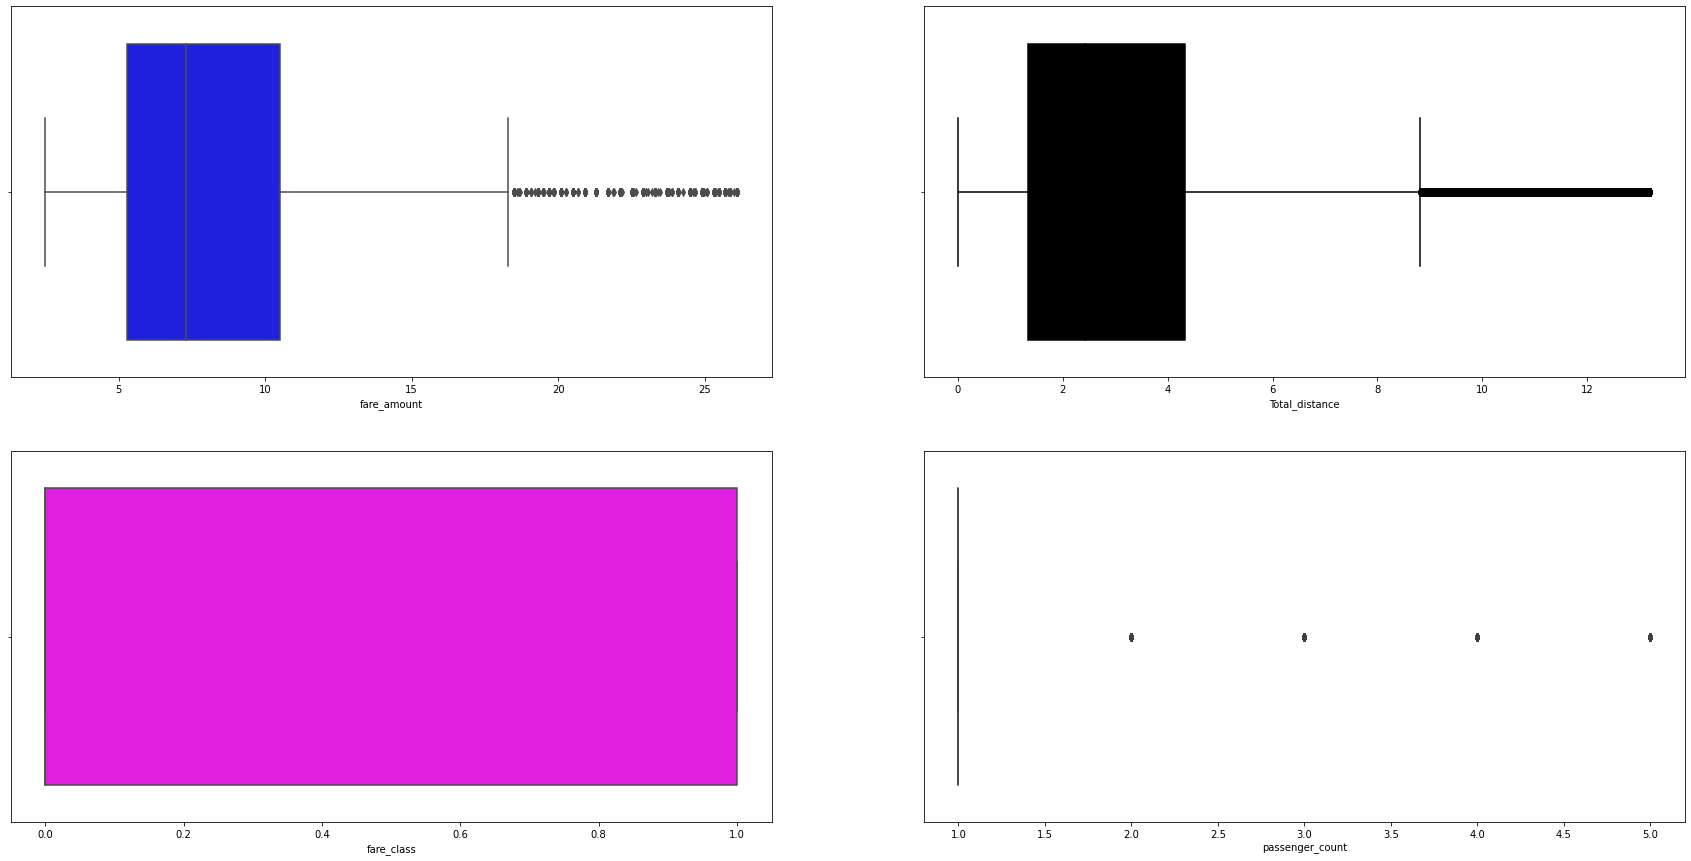

In [318]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df["fare_amount"], ax=ax[0,0], color = "blue")
sns.boxplot(df["Total_distance"], ax=ax[0,1], color = "black")
sns.boxplot(df["fare_class"], ax=ax[1,0], color = "magenta")
sns.boxplot(df["passenger_count"], ax=ax[1,1])

In [319]:
x=df.drop(['fare_amount'], axis = 1)
y=df['fare_amount']
x.shape, y.shape

((81079, 8), (81079,))

TRAIN TEST SPLIT

In [320]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

In [321]:
x_train.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,Total_distance
81153,0,1,2010,4,13,14,56,1.935879
118988,0,1,2010,4,20,20,57,2.264570
29858,0,1,2010,4,23,17,24,1.879367
16030,1,1,2010,4,13,22,31,8.612698
37527,1,1,2010,4,13,15,48,3.432658


In [322]:
X_train = x_train.values
X_test = x_test.values

## XGBOOST REGRESSOR MODEL

In [323]:
import xgboost

In [324]:
clf=xgboost.XGBRegressor()
clf.fit(X_train,y_train)

[12:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [325]:
y_pred=clf.predict(X_test)

In [326]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9728594069370998
MAE: 0.7908645112066358
MSE: 1.3558305550547123
RMSE: 1.164401371973905


HYPERPARAMETER TUNING

In [327]:
clf=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=25, min_child_weight=6, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
clf.fit(X_train,y_train)

[12:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=25, min_child_weight=6, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [328]:
y_pred=clf.predict(X_test)

In [329]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9670280496693623
MAE: 0.8584819788661096
MSE: 1.6422721817874457
RMSE: 1.2815116783656113


In [330]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  

  return clf.predict(sample_value)

In [331]:
sample_value = [0, 1, 2010, 4, 19, 8, 17, 2.126312]
#sample_value = [2.126312, 2010, 4, 19, 17, 0, 8, 1]
predict_exit(sample_value)

array([7.0422688], dtype=float32)

In [333]:
sample_value = [1, 2, 2010, 4, 17, 11, 23, 3.326763]
predict_exit(sample_value)

array([10.118976], dtype=float32)

In [336]:
sample_value = [1, 	1, 	2010 ,	4 ,	17 ,	2 ,	19, 	7.231321]
predict_exit(sample_value)

array([19.399702], dtype=float32)